<a href="https://colab.research.google.com/github/zilves27/PUC/blob/main/Projeto_MVP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP 2 - Cancer Data Analysis

Definição do Problema:

- Descrição do problema: O objetivo é avaliar pacientes diagnosticados com câncer, distinguindo-os entre os tipos maligno e benigno;
- Premissas ou hipóteses sobre o problema: Inicialmente a expectativa era de que certos atributos fossem mais relevantes na classificação do câncer, como por exemplo o tamanho do tumor, características histológicas, ou algum outro;
- Restrições ou condições impostas para selecionar os dados: Não foram aplicadas/identificadas restrições;
- Descrição do dataset: O dataset utilizado contém informações sobre características clínicas e patológicas de pacientes com câncer, incluindo medidas de tamanho do tumor, textura, perímetro, área, suavidade, compactação, concavidade, simetria, dimensão fractal, dentre outros atributos;

Importar Bibliotecas Necessárias

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.multiclass import type_of_target

Carregar Dataset

In [43]:
# Carregar o arquivo CSV diretamente do github
url = "https://raw.githubusercontent.com/zilves27/PUC/main/Cancer_Data.csv"
ds = pd.read_csv(url, sep=";")

# Visualizar as primeiras linhas do Dataset
print(ds.head())

         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60

Preparação dos dados:

- Separação entre treino e teste: O dataset foi dividido utilizando a técnica holdout, onde 70% dos dados foram destinados ao treinamento e 30% para testes;
- Uso de validação cruzada: Foi utilizada a técnica de validação cruzada estratificada com 5 partições (StratifiedKFold) para avaliar os modelos;
- Transformação dos dados: Foi utilizado a técnica de StandardScaler para realizar a padronização dos dados;

Separar Bases em Treino e Teste Utilizando Holdout

In [44]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 42 # semente aleatória

# Separação conjuntos de treino e teste
array = ds.values
X = array[:,0:31]
y = array[:,31]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # holdout

# Parâmetros e partições para validação cruzada
scoring = 'accuracy'
num_particoes = 5
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada

Modelagem e treinamento:

- Algoritmos selecionados: Foram selecionados alguns algoritmos de classificação, tais como: Regressão Logística, K-Nearest Neighbors (KNN), Árvore de Decisão (CART), Naive Bayes (NB), Support Vector Machines (SVM), Bagging, Random Forest, Extra Trees, AdaBoost e Gradient Boosting;
- Não foi considerado ajuste inicial para hiperparâmetros;
- Otimização dos hiperparâmetros: Foi realizada uma otimização dos hiperparâmetros para o algoritmo KNN usando GridSearchCV;
- Avaliação de modelos avançados ou complexos: Utilizou-se a abordagem de VotingClassifier do ensemble, combinando os modelos para escolha;

Modelagem e Inferência

Linha base

LR: 0.625633 (0.004077)
KNN: 0.740981 (0.055974)
CART: 0.929747 (0.030041)
NB: 0.618101 (0.012268)
SVM: 0.613133 (0.025641)
Bagging: 0.944842 (0.025601)
RF: 0.952310 (0.012094)
ET: 0.962373 (0.013636)
Ada: 0.964873 (0.016556)
GB: 0.952405 (0.029916)
Voting: 0.630633 (0.010502)


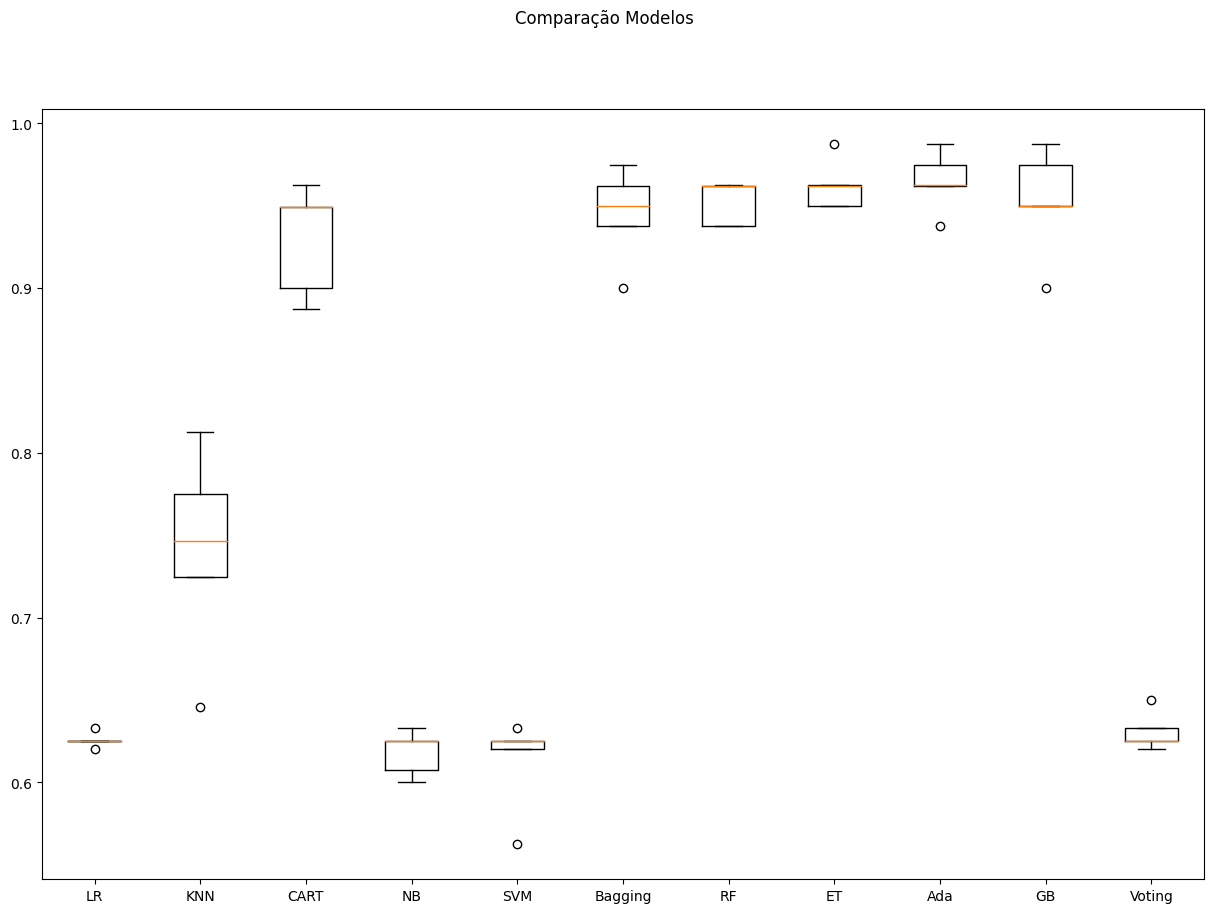

In [45]:
np.random.seed(42) # definindo semente global

# Lista de armazenagem dos modelos
models = []

# Criação dos modelos e adição na lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definição dos parâmetros para classificador base do BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 250
max_features = 4

# Criação dos modelos do VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criação dos ensembles e adição na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas de armazenamento dos resultados
results = []
names = []

# Avaliar os modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot comparativo dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



Dados Padronizados e Normalizados

LR-orig: 0.626 (0.004)
KNN-orig: 0.741 (0.056)
CART-orig: 0.930 (0.030)
NB-orig: 0.618 (0.012)
SVM-orig: 0.613 (0.026)
Bag-orig: 0.945 (0.026)
RF-orig: 0.952 (0.012)
ET-orig: 0.962 (0.014)
Ada-orig: 0.965 (0.017)
GB-orig: 0.952 (0.030)
Vot-orig: 0.631 (0.011)
LR-padr: 0.980 (0.020)
KNN-padr: 0.952 (0.012)
CART-padr: 0.927 (0.031)
NB-padr: 0.937 (0.026)
SVM-padr: 0.967 (0.020)
Bag-padr: 0.945 (0.028)
RF-padr: 0.950 (0.022)
ET-padr: 0.965 (0.012)
Ada-padr: 0.970 (0.010)
GB-padr: 0.952 (0.030)
Vot-padr: 0.975 (0.018)
LR-norm: 0.957 (0.026)
KNN-norm: 0.965 (0.005)
CART-norm: 0.932 (0.032)
NB-norm: 0.937 (0.026)
SVM-norm: 0.965 (0.018)
Bag-norm: 0.947 (0.028)
RF-norm: 0.955 (0.015)
ET-norm: 0.962 (0.016)
Ada-norm: 0.970 (0.010)
GB-norm: 0.955 (0.030)
Vot-norm: 0.960 (0.021)


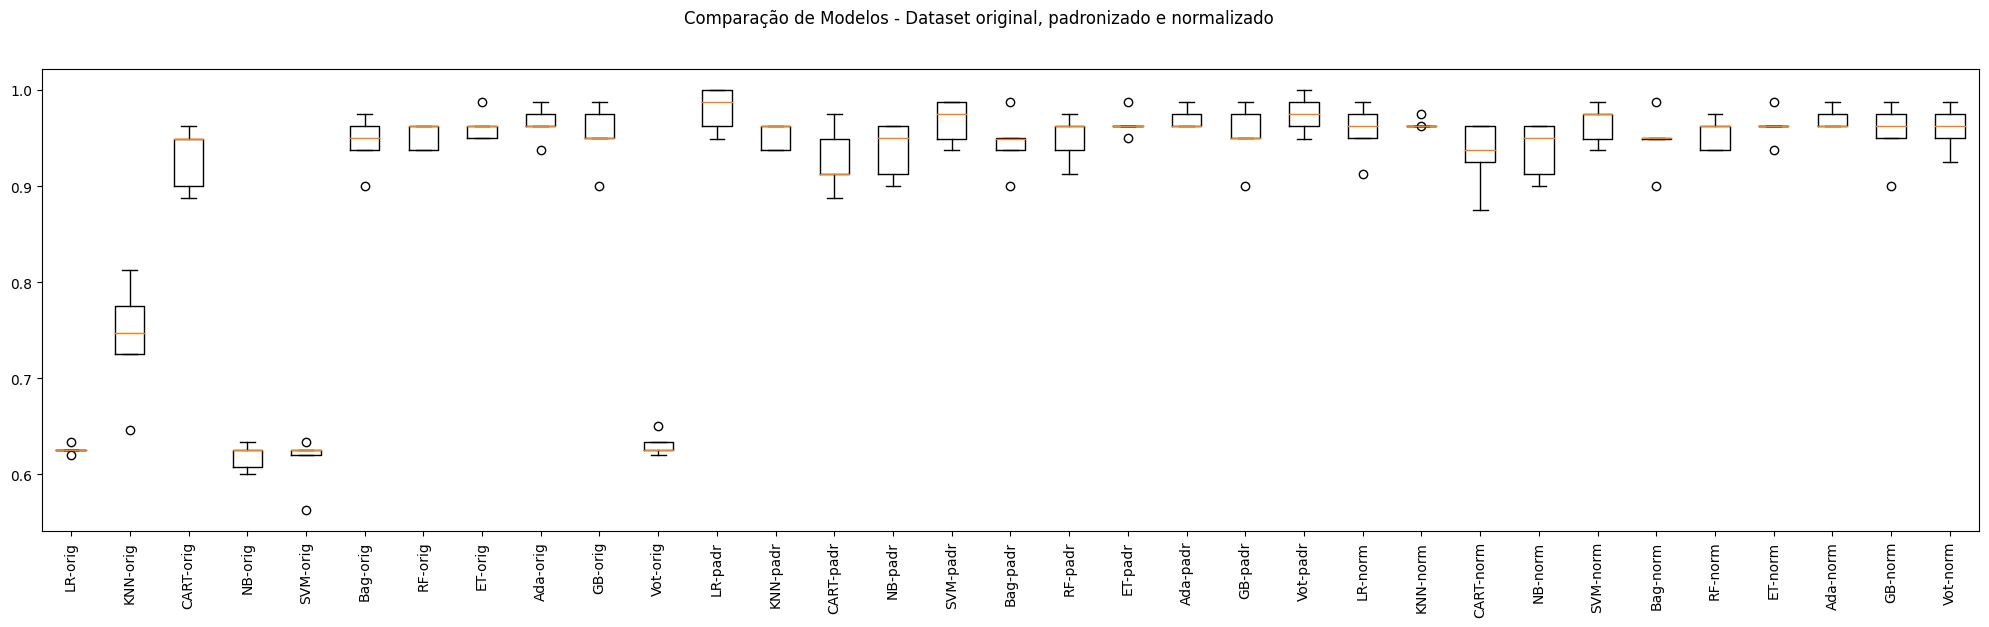

In [46]:
np.random.seed(42) # definindo semente global

# Listas de armazenamento dos pipelines e resultados para as visões do dataset
pipelines = []
results = []
names = []


# Criação dos elementos para o pipeline


# Algoritmos utilizados para avaliação
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))


# Transformações utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Execução de pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot para comparação de modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação de Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Hiperparâmetros otimizados

In [47]:
# Tuning do KNN

np.random.seed(42) # definição da seed global

pipelines = []


# Definição do pipeline

knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
    }

# GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.844304 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.967405 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.964842 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}


Avaliação de Resultados:

- Métricas de avaliação selecionadas: Por se tratar de um tema relacionado diretamente a saúde, a acurácia (accuracy_score) foi utilizada como métrica para avaliar os modelos;
- Treinamento e teste do modelo: No modelo final utilizou-se a LR (Logistic Regression - Regressão Logística) para treinar todo o conjunto de treinamento e testado com o conjunto de teste;
- Overfitting: não foi identificado problemas de overfitting;
- Comparação de resultados: Os resultados dos diferentes modelos foram comparados usando a acurácia como métrica, além de um visualização através do boxplot plotando as diferenção de desempenho entre modelos;


Melhor solução encontrada:

- A melhor solução encontrada foi através da LR (Logistic Regression - Regressão Logística) nos dados padronizados, com um resultado de 98% de acurácia, sendo que no conjunto de testes o resultado superou esse número atingindo 98,25% de acurácia;

Simulação e aplicação do modelo com dados simulados:

- Foram também criados novos dados simulados para testar o modelo treinado. Os novos dados foram padronizados utilizando o mesmo scaler utilizado no treinamento do modelo, sendo que em seguida foi feita a predição das classes utilizando o modelo final. Os resultados das predições foram exibidos ao final como resultado [0. 1. 0. 0. 0.]

Modelo Final

In [48]:
# Avaliação do modelo no conjunto de testes

# Preparar modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização com conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Acurácia estimada com o conjunto de teste
rescaledTestX = scaler.transform(X_test) # padronização e aplicação no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9824561403508771


In [49]:
# Preparação do modelo em todo dataset
scaler = StandardScaler().fit(X) # ajuste do scaler em todo dataset
rescaledX = scaler.transform(X) # aplicação da padronização em todo dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

In [50]:
# teste com todos os dados do data set

Simulação e aplicação do modelo com dados simulados

In [51]:
# Novos dados - não sabemos a classe!
data = {'id_2':[54879, 215875, 271088, 954876, 2256878],
        'rad_mean':[9, 21, 25, 9, 18],
        'tex_mean':[12, 24, 36, 24, 36],
        'per_mean':[70, 80, 90, 70, 70],
        'are_mean':[200, 300, 400, 250, 400],
        'smo_mean':[0.08, 0.12, 0.15, 0.15, 0.09],
        'com_mean':[0.09, 0.20, 0.32, 0.10, 0.10],
        'con_mean':[0.01, 0.20, 0.35, 0.35, 0.02],
        'con2_mean':[0.1, 0.1, 0.1, 0.2, 0.1],
        'sym_mean':[0.1, 0.2, 0.3, 0.3, 0.3],
        'fra_mean':[0.9, 0.2, 0.6, 0.8, 0.5],
        'rad_se':[1.2, 0.6, 0.9, 0.7, 1.2],
        'tex_se':[3, 3, 2, 2, 2],
        'per_se':[2, 1, 8, 7, 7],
        'are_se':[50, 50, 50, 50, 50],
        'smo_se':[0.002, 0.02, 0.025, 0.003, 0.003],
        'com_se':[0.1, 0.1, 0.1, 0.1, 0.1],
        'con_se':[0, 0, 0, 0, 0],
        'con2_se':[0.006, 0.03, 0.02, 0.01, 0.008],
        'sym_se':[0.02, 0.03, 0.01, 0.03, 0.01],
        'fra_se':[0.001, 0.001, 0.001, 0.001, 0.001],
        'rad_worst':[10, 15, 15, 10, 15],
        'tex_worst':[22, 40, 35, 30, 30],
        'per_worst':[184, 99, 78, 85, 150],
        'are_worst':[800, 750, 950, 750, 750],
        'smo_worst':[0.22,0.08, 0.1, 0.11, 0.18],
        'com_worst':[0.75, 0.4, 0.6, 0.6, 0.3],
        'con_worst':[1, 1.1, 1.2, 1.1, 1],
        'con2_worst':[0.08, 0.08, 0.22, 0.2, 0.2],
        'sym_worst':[0.2, 0.6, 0.4, 0.5, 0.3],
        'fra_worst':[0.1,0.2,0.2, 0.15, 0.13],
        }

atributos = ['id_2', 'rad_mean', 'tex_mean', 'per_mean', 'are_mean', 'smo_mean', 'com_mean', 'con_mean', 'con2_mean', 'sym_mean', 'fra_mean', 'rad_se', 'tex_se', 'per_se', 'are_se', 'smo_se', 'com_se', 'con_se', 'con2_se', 'sym_se', 'fra_se', 'rad_worst', 'tex_worst', 'per_worst', 'are_worst', 'smo_worst', 'com_worst', 'con_worst', 'con2_worst', 'sym_worst', 'fra_worst']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:31].astype(float)

# Padronização nos dados de entrada com scaler de X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-2.42709055e-01 -1.45622364e+00 -1.69635014e+00 -9.04908884e-01
  -1.29375129e+00 -1.16428664e+00 -2.71782866e-01 -9.89323133e-01
   1.31757865e+00 -2.96317368e+00  1.18682151e+02  2.86870098e+00
   3.23524110e+00 -4.28725828e-01  2.12600780e-01 -1.68039443e+00
   4.16499250e+00 -1.05750068e+00 -9.40189458e-01 -6.56607235e-02
  -1.05717614e+00 -1.29823969e+00 -5.98812968e-01  2.28572912e+00
  -1.41658106e-01  3.84140079e+00  3.15356694e+00  3.49169287e+00
  -5.26935028e-01 -1.45722513e+00  8.89655662e-01]
 [-2.41420166e-01  1.95194671e+00  1.09613041e+00 -4.93006882e-01
  -1.00934103e+00  1.68233104e+00  1.81287987e+00  1.39612138e+00
   1.31757865e+00  6.87769722e-01  1.94498665e+01  7.03174967e-01
   3.23524110e+00 -9.23756439e-01  2.12600780e-01  4.31984884e+00
   4.16499250e+00 -1.05750068e+00  2.95284252e+00  1.14512431e+00
  -1.05717614e+00 -2.62827036e-01  2.33237528e+00 -2.46067145e-01
  -2.29553741e-01 -2.29562400e+00  9.27077936e-01  3.97144523e+00
  -5.26935028e-01  5.0138

In [52]:
# Predição das classes dos novos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 0. 0. 0.]
